In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
C_m = 20.0         # Membrane capacitance
g_Ca = 4.0         # Calcium channel conductance
g_K = 8.0          # Potassium channel conductance
g_L = 2.0          # Leakage channel conductance
E_Ca = 120.0       # Calcium ion equilibrium potential
E_K = -84.0        # Potassium ion equilibrium potential
E_L = -60.0        # Leakage channel equilibrium potential

V1 = -1.0
V2 = 15.0
V3 = 10.0
V4 = 15.0
phi = 0.04         # Time scale adjustment parameter for w

dt = 0.1
T = 1000
time = np.arange(0, T, dt)
V = np.zeros(len(time))
w = np.zeros(len(time))

I_ext = np.zeros_like(time)
I_ext[(time >= 100) & (time <= 500)] = 80.0
# Input current

In [14]:
def m_inf(V):
    return 0.5 * (1 + np.tanh((V - V1) / V2))
    # Activation variable for calcium ion channel

def w_inf(V):
    return 0.5 * (1 + np.tanh((V - V3) / V4))
    # Inactivation variable for potassium ion channel

def tau_w(V):
    return 1 / np.cosh((V - V3) / (2 * V4))
    # Time constant for the inactivation variable of the potassium ion channel

def I_ion(V, w):
    I_Ca = g_Ca * m_inf(V) * (V - E_Ca)
    I_K = g_K * w * (V - E_K)
    I_L = g_L * (V - E_L)
    return I_Ca + I_K + I_L
    # Total ionic current

In [15]:
V[0] = -60.0
w[0] = w_inf(V[0])

for i in range(1, len(time)):
    dV = (-I_ion(V[i-1], w[i-1]) + I_ext[i-1]) / C_m
    dw = phi * (w_inf(V[i-1]) - w[i-1]) / tau_w(V[i-1])

    V[i] = V[i-1] + dV * dt
    w[i] = w[i-1] + dw * dt
    # Update membrane potential and inactivation variable

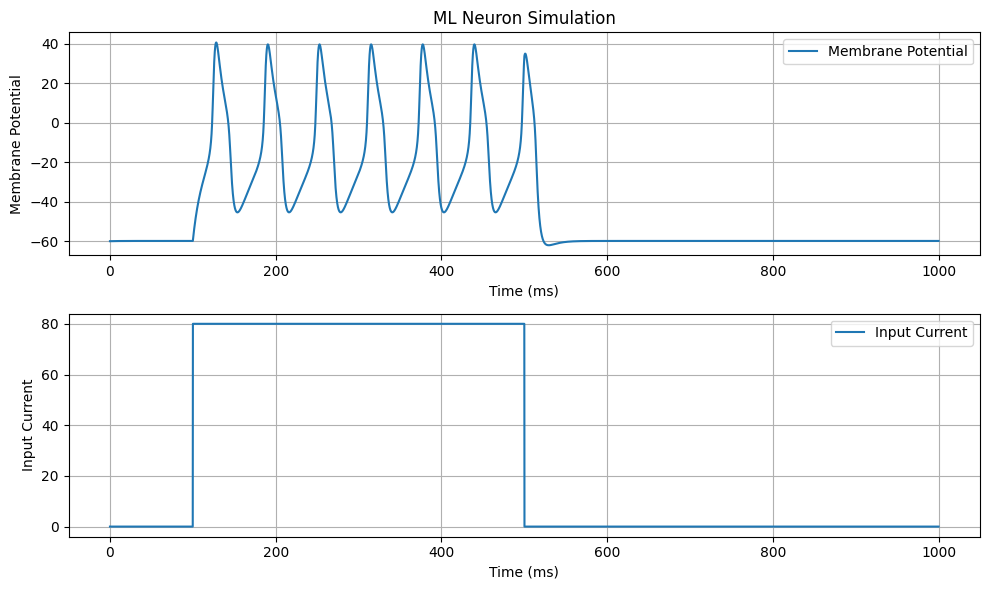

In [16]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time, V, label="Membrane Potential")
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential")
plt.title("ML Neuron Simulation")
plt.legend()
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(time, I_ext, label="Input Current")
plt.xlabel("Time (ms)")
plt.ylabel("Input Current")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()